<a href="https://colab.research.google.com/github/asmali1326/DeepLearning/blob/main/HW3_CNN_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the CIFAR-10 dataset 

In [1]:
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


The ten classes in CIFAR-10 dataset are the following:

`Classes: ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']`

Plotting one of the training example and printing it's size

(32, 32, 3)

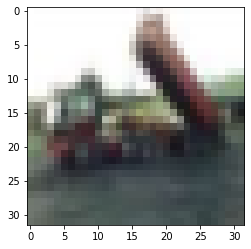

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
x_train[0].shape

In [ ]:
len(x_test)

10000

In [ ]:
y_train[4]

array([1], dtype=uint8)

In [2]:
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

In [ ]:
x_test

For part 3, trying after normalizing the data by subtracting the mean and dividing by the standard deviation.

In [3]:
mean = x_train.mean(axis=0)
x_train = x_train.astype('float64')
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test = x_test.astype('float64')
x_test -= mean
x_test /= std

Checking the mean subtracted and divided by standard deviation values.

In [ ]:
x_test

Turining the labels into categorical

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
from keras import layers
from keras import models
from tensorflow.keras import initializers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())

# init = initializers.GlorotUniform()
# values = init(shape=(2, 2))

model.add(layers.Dense(64, kernel_initializer='random_normal', activation='relu'))
# model.add(layers.Dropout(rate=0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

Batch Normalization Ref:https://keras.io/api/layers/normalization_layers/batch_normalization/


Note on dropout layer:
`keras.layers.Dropout(rate, noise_shape=None, seed=None)`
Rate: the parameter p which determines the odds of dropping out neurons. When you did not validate which p works best for you with a validation set,
it’s best to set it to rate≈0.5 for hidden layers and rate≈0.1 for the input layer (note that rate≈0.1 equals p≈0.9 – Keras turns the logic upside down, making rate the odds of dropping out rather than keeping neurons!)
DropOut Ref:https://www.machinecurve.com/index.php/2019/12/18/how-to-use-dropout-with-keras/


For part 6, using stochastic gradient descent 

In [6]:
from tensorflow.keras import optimizers
OPT = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, name="SGD")

https://keras.io/api/optimizers/sgd/

In [17]:
model.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train, y_train,epochs=15, batch_size=512)
# model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=3, batch_size=128)

Epoch 1/15
98/98 [==============================] - 76s 772ms/step - loss: 2.1121 - accuracy: 0.2834
Epoch 2/15
98/98 [==============================] - 76s 776ms/step - loss: 1.6821 - accuracy: 0.4022
Epoch 3/15
98/98 [==============================] - 76s 778ms/step - loss: 1.5361 - accuracy: 0.4557
Epoch 4/15
98/98 [==============================] - 76s 777ms/step - loss: 1.4357 - accuracy: 0.4909
Epoch 5/15
98/98 [==============================] - 78s 794ms/step - loss: 1.3574 - accuracy: 0.5203
Epoch 6/15
98/98 [==============================] - 77s 783ms/step - loss: 1.2940 - accuracy: 0.5453
Epoch 7/15
98/98 [==============================] - 79s 804ms/step - loss: 1.2415 - accuracy: 0.5632
Epoch 8/15
98/98 [==============================] - 76s 778ms/step - loss: 1.1972 - accuracy: 0.5807
Epoch 9/15
98/98 [==============================] - 76s 781ms/step - loss: 1.1564 - accuracy: 0.5950
Epoch 10/15
98/98 [==============================] - 77s 782ms/step - loss: 1.1233 - accura

In [ ]:
model.predict(x_test[:1])

In [ ]:
y_test[:1]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1066 - accuracy: 0.6147


To plot the accuracy and loss curves

In [ ]:
hist.history['loss']

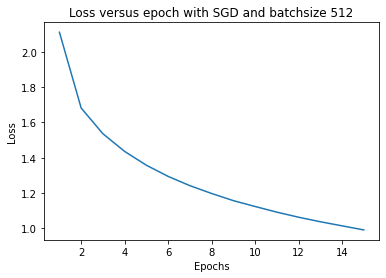

In [19]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss versus epoch with SGD and batchsize 512')
# plt.title('Hidden layers = {:.0f} and relu'.format(node_h))
plt.show()

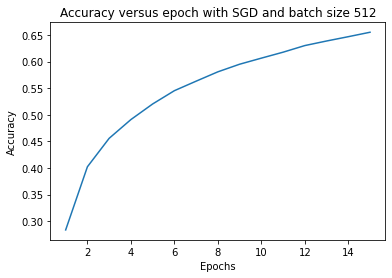

In [20]:
acc = hist.history['accuracy']
plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy versus epoch with SGD and batch size 512')
plt.show()

https://missinglink.ai/guides/neural-network-concepts/convolutional-neural-network-build-one-keras-pytorch/

https://jovian.ml/rksensational/03-cifar10-feedforward/v/6?utm_source=embed#C5